# Analysis of ROC and PR curves

Dr Jose M Albornoz, May 2019

Summary:

* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
* ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In a classification problem we may decide to predict probabilities for each of the classes instead of the class labels. This provides the capability of setting a threshold to control how an estimator generates predictions. More importantly, by adjusting this threshold the metrics that describe the performance of the estimator can be adjusted to satisfy business requirements. For instance, in a system designed to predict credit card fraud it might be desirable to identify a transaction as fraudulent only if there is a high probability of it being so (say, over 95%) to avoid annoying customers innecesarily.

A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

# 1.- ROC Curves

A ROC (receiver operating chracteristic) curve is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values, ranging between 0.0 and 1.0. Put another way, it plots the hit rate versus the false alarm rate.

* True Positive Rate = True Positives / (True Positives + False Negatives) = True Positives / All Real Positives
* False Positive Rate = False Positives / (False Positives + True Negatives) = False Positives / All Real Negatives

The true positive rate is also known as sensitivity or recall, whilst the false positive rate can be defined in terms of the specificity:

* Specificity = True Negatives / (True Negatives + False Positives) = True Negatives / All Real Negatives
* False Positive Rate = 1 - Specificity

The ROC curve is a useful tool for several reasons:

* Curves for different models can be compared .
* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives
* The area under the curve (AUC) can be used as a summary of the model skill.

A skillful model will on average assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence. The higher the area under the ROC curve, the higher the skill of the model (as long as there is balance between the classes we are trying to detect, as we will see in the following paragraphs).

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

A complete example of calculating the ROC curve and AUC for a logistic regression model on a small test problem is listed below.

In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1, 1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [3]:
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

AUC: 0.895


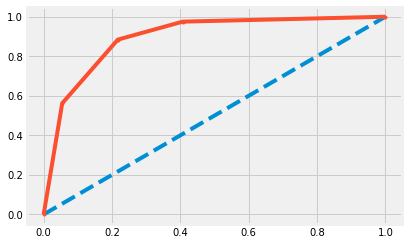

In [4]:
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# 2.- Precision-Recall curves

Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. In other words, precision tells us what is the percentage of time we come up with an accurate prediction for positive cases every time we predict one.

* Precision = True Positives / (True Positives + False Positives)

Recall (also know as sensitivity) is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Or in other words, recall expresses the proportion of real-worlds positive cases are identified by our estimator.

* Recall = True Positives / (True Positives + False Negatives)

Examining both precision and recall is useful in cases where there is an imbalance in the observations between the two classes (specifically, there are many instances of the negative class and only a few examples of the positive one). The reason for this is that typically the large number of negative class instances means we are less interested in the skill of the model at predicting class 0 correctly; that is, we are less interested in obtaining a higher number of true negatives. Therefore, key to the calculation of precision and recall is that the calculations do not consider true negatives: it is only concerned with the correct prediction of the minority class.

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. The no-skill line is defined by the total number of positive cases divide by the total number of positive and negative cases. For a dataset with an equal number of positive and negative cases, this is a straight line at 0.5; points above this line show skill.

There are several composite scores that attempt to summarize precision and recall; three examples include:

* F score or F1 score: calculates the harmonic mean of precision and recall (harmonic mean because the precision and recall are ratios).
* Average precision: summarizes the weighted increase in precision with each change in recall for the thresholds in the precision-recall curve.
* Area Under PR Curve: like the AUC, it summarizes the integral or an approximation of the area under the precision-recall curve.

In terms of model selection, F1 summarizes model skill for a specific probability threshold, whereas average precision and area under PR curve summarize the skill of a model across thresholds, like ROC AUC.

A complete example of calculation of a precision-recall curve is listed below:

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [6]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1, 1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [7]:
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

f1=0.836 aucPR=0.892 ap=0.840


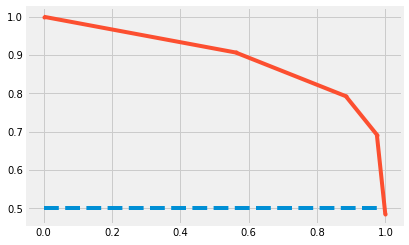

In [8]:
# predict class values
yhat = model.predict(testX)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)

# calculate F1 score
f1 = f1_score(testy, yhat)

# calculate precision-recall AUC
aucPR = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f aucPR=%.3f ap=%.3f' % (f1, aucPR, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

# 3.- When to Use ROC vs. Precision-Recall Curves?

* **ROC curves should be used when there are roughly equal numbers of observations for each class.**
* **Precision-Recall curves should be used when there is a moderate to large class imbalance.**

The reason for this recommendation is that ROC curves present an optimistic picture of the model for datasets with a class imbalance; some go further and suggest that using a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill. The main reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve and the avoidance of this metric in the construction of the Precision-Recall curve.


We can make this concrete with a short example: below is the same ROC Curve example previously presented but with a 10:1 ratio of class=0 to class=1 observations.

In [9]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.09], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [10]:
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

AUC: 0.713


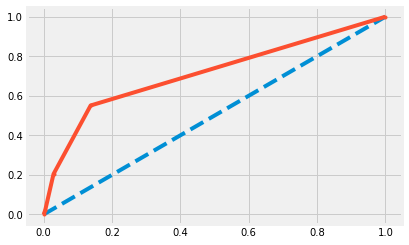

In [11]:
# calculate AUC
aucROC = roc_auc_score(testy, probs)
print('AUC: %.3f' % aucROC)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

The above plot suggests that the model has skill, but much of that skill comes from making correct false negative predictions, and there are a lot of false negative predictions to make.

f1=0.278 aucPR=0.302 ap=0.236


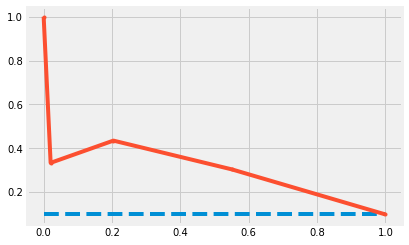

In [12]:
# predict class values
yhat = model.predict(testX)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)

# calculate F1 score
f1 = f1_score(testy, yhat)

# calculate precision-recall AUC
aucPR = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f aucPR=%.3f ap=%.3f' % (f1, aucPR, ap))

# plot no skill
plt.plot([0, 1], [0.1, 0.1], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

The scores do not look encouraging, given skilful models are generally above 0.5. From the plot, we can see that precision and recall crash fast.